<a href="https://colab.research.google.com/github/YennieLee/Final-Team3/blob/main/3%ED%8C%80_%ED%8C%8C%EC%9D%B4%EB%84%90_%EC%BD%94%EB%93%9C%ED%8C%80_%ED%8C%8C%EC%9D%B4%EB%84%90_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 전처리

a. 라이브러리 임포트

In [ ]:
# import libraries

import os
import pandas as pd
import numpy as np
import kagglehub
import missingno as msno
from datetime import datetime

### b. 데이터 로드 및 확인

In [ ]:
path = kagglehub.dataset_download("danieldvok280/airbnb-2024-combined-dataset")

100%|██████████| 5.39M/5.39M [00:00<00:00, 64.7MB/s]

Extracting files...


In [ ]:
# load data

path = kagglehub.dataset_download("danieldvok280/airbnb-2024-combined-dataset")
file_name = "combined_dataset.csv"
full_path = os.path.join(path, file_name)

try:
    airbnb = pd.read_csv(full_path)
    display(airbnb.head(3))

except FileNotFoundError:
    print(f"⛔️ 파일을 찾을 수 없습니다: {full_path}")
    print("경로나 파일 이름이 맞는지 다시 확인해주세요.")

Using Colab cache for faster access to the 'airbnb-2024-combined-dataset' dataset.


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,23163,https://www.airbnb.com/rooms/23163,20240325142220,2024-03-25,city scrape,Residence Karolina - KAROL12,"Unique and elegant apartment rental in Prague,...",NaN,https://a0.muscache.com/pictures/01bbe32c-3f13...,5282,...,4.96,4.93,4.86,NaN,t,70,69,0,0,0.18
1,23169,https://www.airbnb.com/rooms/23169,20240325142220,2024-03-25,city scrape,Residence Masna - Masna302,Masna studio offers a lot of space and privacy...,NaN,https://a0.muscache.com/pictures/b450cf2a-8561...,5282,...,4.86,4.97,4.69,NaN,t,70,69,0,0,0.69
2,26755,https://www.airbnb.com/rooms/26755,20240325142220,2024-03-25,city scrape,Central Prague Old Town Top Floor,Big and beautiful new attic apartment in the v...,This apartment offers a fantastic location. Yo...,https://a0.muscache.com/pictures/miso/Hosting-...,113902,...,4.96,4.93,4.89,NaN,f,3,3,0,0,3.32


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11446 entries, 0 to 11445
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11446 non-null  int64  
 1   listing_url                                   11446 non-null  object 
 2   scrape_id                                     11446 non-null  int64  
 3   last_scraped                                  11446 non-null  object 
 4   source                                        11446 non-null  object 
 5   name                                          11446 non-null  object 
 6   description                                   9276 non-null   object 
 7   neighborhood_overview                         5663 non-null   object 
 8   picture_url                                   11446 non-null  object 
 9   host_id                                       11446 non-null 

In [ ]:
# 컬럼별 결측치 비중 계산

missing_percentage = (airbnb.isnull().sum() / len(airbnb)) * 100
missing_percentage.sort_values(ascending=False)

,0
license,100.000000
calendar_updated,100.000000
neighbourhood_group_cleansed,100.000000
neighbourhood,50.524201
neighborhood_overview,50.524201
...,...
instant_bookable,0.000000
calculated_host_listings_count,0.000000
calculated_host_listings_count_entire_homes,0.000000
calculated_host_listings_count_private_rooms,0.000000


<Axes: >

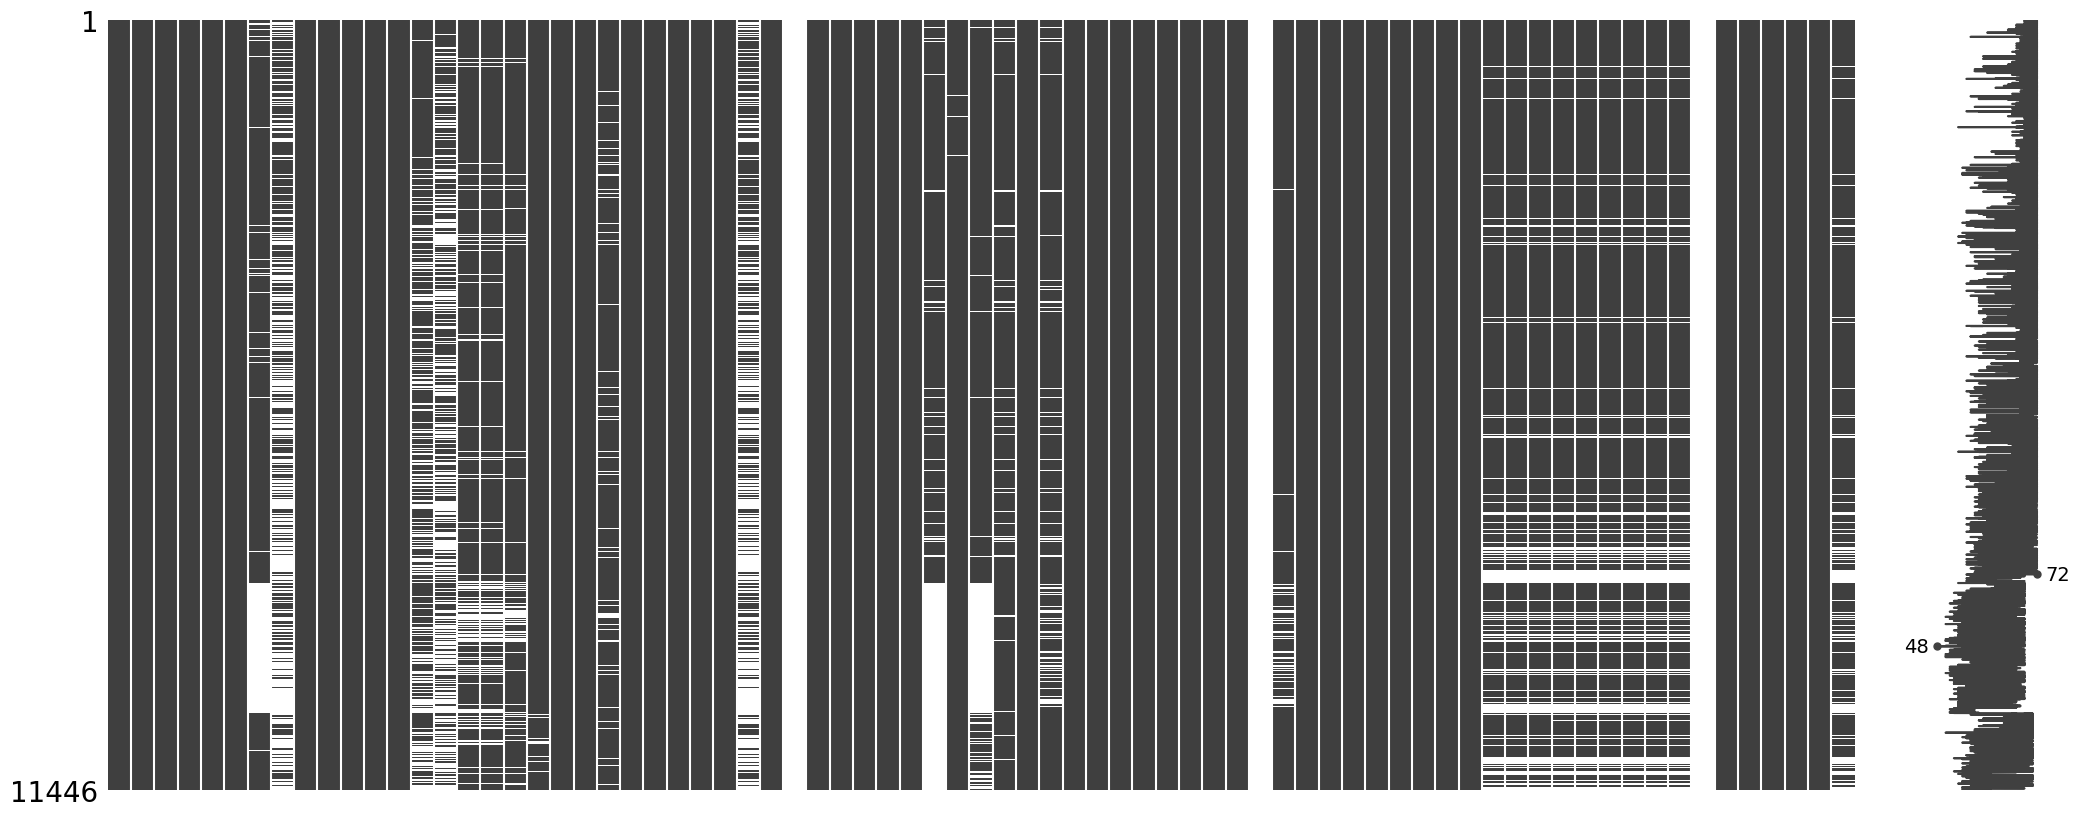

In [ ]:
# 컬럼별 결측치 확인 (시각화)

msno.matrix(airbnb)

### c. 필요한 컬럼만 추출

In [ ]:
features = [

    # 숙소 자체 정보
    'id', 'name', 'listing_url', 'description', 'room_type', 'accommodates', 'amenities',
    'bathrooms', 'bedrooms', 'beds',

    # 위치 정보
    'neighborhood_overview', 'neighbourhood_cleansed', 'latitude', 'longitude',

    # 호스트 정보
    'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
    'host_response_time', 'host_response_rate', 'host_acceptance_rate',
    'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
    'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',

    # 예약 및 가격 정보
    'price', 'minimum_nights', 'maximum_nights', 'has_availability',
    'availability_30', 'availability_365', 'instant_bookable',

    # 리뷰 및 평점 정보
    'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value', 'reviews_per_month'

            ]

In [ ]:
df = airbnb[features]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11446 entries, 0 to 11445
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           11446 non-null  int64  
 1   name                         11446 non-null  object 
 2   listing_url                  11446 non-null  object 
 3   description                  9276 non-null   object 
 4   room_type                    11446 non-null  object 
 5   accommodates                 11446 non-null  int64  
 6   amenities                    11446 non-null  object 
 7   bathrooms                    8043 non-null   float64
 8   bedrooms                     9104 non-null   float64
 9   beds                         11027 non-null  float64
 10  neighborhood_overview        5663 non-null   object 
 11  neighbourhood_cleansed       11446 non-null  object 
 12  latitude                     11446 non-null  float64
 13  longitude       

### d. 데이터 타입 변환

In [ ]:
# host_since (str -> date)

df['host_since'] = pd.to_datetime(df['host_since'])

/tmp/ipython-input-2173827091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_since'] = pd.to_datetime(df['host_since'])


In [ ]:
# host_response_rate (str -> float)

df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
df['host_response_rate'] = df['host_response_rate'].astype('float')

/tmp/ipython-input-939356256.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
/tmp/ipython-input-939356256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_response_rate'] = df['host_response_rate'].astype('float')


In [ ]:
# host_acceptance_rate (str -> float)

df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype('float')

/tmp/ipython-input-1287242919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
/tmp/ipython-input-1287242919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_acceptance_rate'] = df['host_acceptance_rate'].astype('float')


In [ ]:
# host_is_superhost (str -> bool)

df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False}).astype('boolean')

/tmp/ipython-input-134544601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_is_superhost'] = df['host_is_superhost'].map({'t': True, 'f': False}).astype('boolean')


In [ ]:
# host_has_profile_pic (str -> bool)

df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': True, 'f': False}).astype('boolean')

/tmp/ipython-input-886936967.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': True, 'f': False}).astype('boolean')


In [ ]:
# host_identity_verified (str -> bool)

df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False}).astype('boolean')

/tmp/ipython-input-2789845410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False}).astype('boolean')


In [ ]:
# price (str -> float)

df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype('float')

/tmp/ipython-input-98540729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace('$', '')
/tmp/ipython-input-98540729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace(',', '')
/tmp/ipython-input-98540729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
# has_availability (str -> bool)

df['has_availability'] = df['has_availability'].map({'t': True, 'f': False}).astype('boolean')

/tmp/ipython-input-1106810118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_availability'] = df['has_availability'].map({'t': True, 'f': False}).astype('boolean')


In [ ]:
# instant_bookable (str -> bool)

df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False}).astype('boolean')

/tmp/ipython-input-3587491320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['instant_bookable'] = df['instant_bookable'].map({'t': True, 'f': False}).astype('boolean')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11446 entries, 0 to 11445
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           11446 non-null  int64         
 1   name                         11446 non-null  object        
 2   listing_url                  11446 non-null  object        
 3   description                  9276 non-null   object        
 4   room_type                    11446 non-null  object        
 5   accommodates                 11446 non-null  int64         
 6   amenities                    11446 non-null  object        
 7   bathrooms                    8043 non-null   float64       
 8   bedrooms                     9104 non-null   float64       
 9   beds                         11027 non-null  float64       
 10  neighborhood_overview        5663 non-null   object        
 11  neighbourhood_cleansed       11446 non-nu

### e. 파생변수 생성

(1) host_duration  
- 해당 숙소를 운영하는 호스트가 에어비앤비에 호스트로 등록하고 활동한 기간

In [ ]:
# 기준 날짜 설정 (2025년 1월 1일)
standard_date = datetime.strptime("20250101", "%Y%m%d")

# 기준날짜 - 호스트 등록일 = 호스트 활동 기간 계산
df['host_duration'] = standard_date - df['host_since']
df['host_duration'].head()

/tmp/ipython-input-3122336058.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_duration'] = standard_date - df['host_since']


,host_duration
0,5859 days
1,5859 days
2,5364 days
3,5859 days
4,5269 days


In [ ]:
# 수치형으로 변경
df['host_duration'] = df['host_duration'].astype('str')
df['host_duration'] = df['host_duration'].str.replace(' days', '')
df['host_duration'] = df['host_duration'].astype('int')
df['host_duration'].head()

/tmp/ipython-input-353595128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_duration'] = df['host_duration'].astype('str')
/tmp/ipython-input-353595128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_duration'] = df['host_duration'].str.replace(' days', '')
/tmp/ipython-input-353595128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,host_duration
0,5859
1,5859
2,5364
3,5859
4,5269


(2) host_is_nearby
- 호스트가 숙소 인근에 거주하는지 여부 (=프라하 시내에 거주하는지)

In [ ]:
# 'host_location' 컬럼의 유니크한 값 확인

df['host_location'].unique()

array(['Prague, Czechia', 'Saint Moritz, Switzerland', 'Tunis, Tunisia',
       'London, United Kingdom', 'Milan, Italy', nan, 'Milovice, Czechia',
       'Aberystwyth, United Kingdom', 'Central Bohemian Region, Czechia',
       'Hlavní město Praha, Czechia', 'Zagreb, Croatia', 'Italy',
       'Tel Aviv, Israel', 'Bourg-Saint-Maurice, France', 'Czechia',
       'Oxford, United Kingdom', 'Novosibirsk, Russia', 'Germany',
       'Boulder, CO', 'Asker, Norway', 'Sachsenheim, Germany',
       'Rancho Santa Fe, CA', 'Seoul, South Korea', 'Osek, Czechia',
       'Los Angeles, CA', 'Dubai, United Arab Emirates',
       'Amsterdam, Netherlands', 'Liberec, Czechia', 'Arlington, VA',
       'Kamenice, Czechia', 'Annecy, France', 'Moscow, Russia',
       'Mnichovice, Czechia', 'Münsterlingen, Switzerland',
       'Lety, Czechia', 'Kadaň, Czechia', 'Kladno, Czechia',
       'Zlin, Czechia', 'Beřovice, Czechia', 'England, United Kingdom',
       'Libochovice, Czechia', 'Braunau am Inn, Austria',
  

In [ ]:
# 유니크한 값 중 프라하 시내로 분류할 수 있는 값만 저장하는 리스트 생성

praha_locations = [
    "Prague, Czechia",
    "Hlavní město Praha, Czechia",
    "Praha, Czechia",
    "Praha 11, Czechia",
    "Prague 9, Czechia"
]

In [ ]:
# 호스트 위치가 해당 리스트 값 중 하나와 일치할 경우 True 반환

df["host_is_nearby"] = df["host_location"].isin(praha_locations).astype(bool)

/tmp/ipython-input-748546749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["host_is_nearby"] = df["host_location"].isin(praha_locations).astype(bool)


In [ ]:
# 확인

print(df[["host_location", "host_is_nearby"]].head(20))

                host_location  host_is_nearby
0             Prague, Czechia            True
1             Prague, Czechia            True
2             Prague, Czechia            True
3             Prague, Czechia            True
4   Saint Moritz, Switzerland           False
5             Prague, Czechia            True
6             Prague, Czechia            True
7             Prague, Czechia            True
8             Prague, Czechia            True
9             Prague, Czechia            True
10            Prague, Czechia            True
11            Prague, Czechia            True
12            Prague, Czechia            True
13            Prague, Czechia            True
14            Prague, Czechia            True
15            Prague, Czechia            True
16            Prague, Czechia            True
17            Prague, Czechia            True
18            Prague, Czechia            True
19             Tunis, Tunisia           False


(3) amenities_count
- 숙소별로 보유하고 있는 어메니티의 수

In [ ]:
# 어메니티 컬럼 확인 : 리스트 형태의 데이터가 문자형으로 들어가있음

df["amenities"].head()

,amenities
0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Dedic..."
1,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Dedic..."
2,"[""Hair dryer"", ""Free washer \u2013 In unit"", ""..."
3,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Shamp..."
4,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Dedic..."


In [ ]:
# 문자형 -> 리스트로 타입 변환

import ast
df["amenities_list"] = df["amenities"].apply(lambda x: ast.literal_eval(x))

/tmp/ipython-input-3078665521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["amenities_list"] = df["amenities"].apply(lambda x: ast.literal_eval(x))


In [ ]:
df["amenities_list"].head()

,amenities_list
0,"[Hair dryer, Carbon monoxide alarm, Dedicated ..."
1,"[Hair dryer, Carbon monoxide alarm, Dedicated ..."
2,"[Hair dryer, Free washer – In unit, Carbon mon..."
3,"[Hair dryer, Carbon monoxide alarm, Shampoo, S..."
4,"[Hair dryer, Carbon monoxide alarm, Dedicated ..."


In [ ]:
# 어메니티 보유 수 계산

df["amenities_count"] = df["amenities_list"].apply(len)
df[["amenities_list", "amenities_count"]].head()

/tmp/ipython-input-696149677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["amenities_count"] = df["amenities_list"].apply(len)


,amenities_list,amenities_count
0,"[Hair dryer, Carbon monoxide alarm, Dedicated ...",30
1,"[Hair dryer, Carbon monoxide alarm, Dedicated ...",28
2,"[Hair dryer, Free washer – In unit, Carbon mon...",58
3,"[Hair dryer, Carbon monoxide alarm, Shampoo, S...",27
4,"[Hair dryer, Carbon monoxide alarm, Dedicated ...",32


(4) has_amenities
- 해당 숙소가 특정 어메니티를 보유하고 있는지 여부 True / False
- 도메인 지식을 기반으로 주요 어메니티 10개 선정 → 각각을 컬럼으로 생성
- Kitchen / Essentials / Wifi / Hair dryer / Hot water / Elevator / Dedicated workspace / Washer / Self check-in / Long term stay allowed

In [ ]:
# 컬럼명 - 키워드 맵핑

amenity_mapping = {
    'has_kitchen': 'Kitchen',
    'has_essentials': 'Essentials',
    'has_wifi': 'Wifi',
    'has_hairdryer': 'Hair dryer',
    'has_hotwater': 'Hot water',
    'has_elevator': 'Elevator',
    'has_dedicated_workplace': 'Dedicated workspace',
    'has_washer': 'Washer',
    'has_self_checkin': 'Self check-in',
    'has_longterm_stay': 'Long term'}

In [ ]:
# amenities 관련 컬럼 생성

for new_column_name, keyword in amenity_mapping.items():
    df[new_column_name] = df['amenities'].str.contains(keyword, case=False, na=False)

/tmp/ipython-input-3689078176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name] = df['amenities'].str.contains(keyword, case=False, na=False)
/tmp/ipython-input-3689078176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name] = df['amenities'].str.contains(keyword, case=False, na=False)
/tmp/ipython-input-3689078176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [ ]:
# 확인

df[amenity_mapping.keys()].head()

,has_kitchen,has_essentials,has_wifi,has_hairdryer,has_hotwater,has_elevator,has_dedicated_workplace,has_washer,has_self_checkin,has_longterm_stay
0,True,True,True,True,False,True,True,True,False,True
1,True,True,True,True,False,True,True,True,False,True
2,True,True,True,True,True,True,False,True,True,True
3,True,True,True,True,False,False,False,True,False,True
4,True,True,True,True,True,False,True,True,False,True


(5) host_response_score
- 호스트가 메세지에 얼마나 빠르게 응답했는지 점수화

In [ ]:
# 응답시간을 점수화하여 맵핑 (빠르게 응답했을수록 높은 값)

mapping = {
    'within an hour': 4,
    'within a few hours': 3,
    'within a day': 2,
    'a few days or more': 1
}

In [ ]:
df['host_response_score'] = df['host_response_time'].map(mapping)

/tmp/ipython-input-1257126175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_response_score'] = df['host_response_time'].map(mapping)


In [ ]:
# 확인

df[['host_response_time', 'host_response_score']].head()

,host_response_time,host_response_score
0,within an hour,4.0
1,within an hour,4.0
2,within an hour,4.0
3,within an hour,4.0
4,within a day,2.0


(6) neighborhood_overview_binary

- 호스트가 동네 소개를 작성했는지 여부
- 작성했다면 True / 작성하지 않은 경우 False



In [ ]:
df['neighborhood_overview_binary'] = df['neighborhood_overview'].notna().astype(bool)

/tmp/ipython-input-2556485132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighborhood_overview_binary'] = df['neighborhood_overview'].notna().astype(bool)


In [ ]:
# 확인

df[['neighborhood_overview', 'neighborhood_overview_binary']].head()

,neighborhood_overview,neighborhood_overview_binary
0,NaN,False
1,NaN,False
2,This apartment offers a fantastic location. Yo...,True
3,NaN,False
4,NaN,False


In [ ]:
# 동네소개 유무 개수 확인

df['neighborhood_overview_binary'].value_counts()

,count
neighborhood_overview_binary,
False,5783
True,5663


In [ ]:
#비율로 확인

df['neighborhood_overview_binary'].value_counts(normalize=True) * 100

,proportion
neighborhood_overview_binary,
False,50.524201
True,49.475799


(7) is_private
- 숙소 공간이 독립공간인지 여부
- 독립공간일 경우 True / 공유공간일 경우 False

In [ ]:
# room type에 따라 맵핑

mapping = {
    'Entire home/apt': True,
    'Hotel room': True,
    'Private room': False,
    'Shared room': False}

df['is_private'] = df['room_type'].map(mapping).astype(bool)

/tmp/ipython-input-341166002.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_private'] = df['room_type'].map(mapping).astype(bool)


In [ ]:
# 확인

df[['room_type', 'is_private']].head()

,room_type,is_private
0,Entire home/apt,True
1,Entire home/apt,True
2,Entire home/apt,True
3,Entire home/apt,True
4,Entire home/apt,True


(8) price_per_person
- 인당 숙박 가격
- 1박 요금 / 수용 가능 인원 으로 계산

In [ ]:
# 수용인원이 0인 경우 결측치 처리

df['accommodates'] = df['accommodates'].replace(0, np.nan)

/tmp/ipython-input-547876712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['accommodates'] = df['accommodates'].replace(0, np.nan)


In [ ]:
# 인당 숙박 가격 계산

df['price_per_person'] = df['price'] / df['accommodates']

/tmp/ipython-input-4198067291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_person'] = df['price'] / df['accommodates']


In [ ]:
# 확인

df[['price', 'accommodates', 'price_per_person']].head()

,price,accommodates,price_per_person
0,3955.0,4.0,988.75
1,2955.0,3.0,985.00
2,3223.0,4.0,805.75
3,6741.0,6.0,1123.50
4,2763.0,3.0,921.00


(9) night_flexibility
- 숙박일수의 유연성
- 최대 숙박 가능일수 - 최소 숙박 가능일수

In [ ]:
# 숙박일수의 유연성을 계산

df['night_flexibility'] = df['maximum_nights'] - df['minimum_nights']

/tmp/ipython-input-1534050021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['night_flexibility'] = df['maximum_nights'] - df['minimum_nights']


In [ ]:
# 확인

df['night_flexibility'].head()

,night_flexibility
0,364
1,364
2,697
3,364
4,358


(10) scaled_night_flexibility
- night_flexibility 를 min - max 정규화로 0~1 사이 값으로 변환

In [ ]:
# min - max 정규화

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['scaled_night_flexibility'] = scaler.fit_transform(df[['night_flexibility']])

/tmp/ipython-input-3695588723.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['scaled_night_flexibility'] = scaler.fit_transform(df[['night_flexibility']])


In [ ]:
# 확인

df[['night_flexibility', 'scaled_night_flexibility']]

,night_flexibility,scaled_night_flexibility
0,364,0.040453
1,364,0.040453
2,697,0.077462
3,364,0.040453
4,358,0.039787
...,...,...
11441,6,0.000667
11442,363,0.040342
11443,362,0.040231
11444,364,0.040453


In [ ]:
df['scaled_night_flexibility'].min()

0.0

In [ ]:
df['scaled_night_flexibility'].max()

1.0

(11) host_about_bool
- 호스트 소개글 유무
- 작성했으면 True / 미작성의 경우 False

In [ ]:
# 호스트가 호스트 소개글을 작성했는지 여부 (결측치인 경우 False)

df["host_about_bool"] = df["host_about"].notna().astype("boolean")

/tmp/ipython-input-728601120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["host_about_bool"] = df["host_about"].notna().astype("boolean")


In [ ]:
df[['host_about', 'host_about_bool']].head()

,host_about,host_about_bool
0,"Hello, \r\nglad to see that you are interested...",True
1,"Hello, \r\nglad to see that you are interested...",True
2,Hi! we are a sp/cz couple with 2 daughters (La...,True
3,"Hello, \r\nglad to see that you are interested...",True
4,I'm a mother to a 8-year old boy whom I treasu...,True


(12) host_description_length
- 호스트 소개글의 길이 (글자수)

In [ ]:
# 호스트 소개글 글자 수 계산

df["host_description_length"] = df["host_about"].astype("string").apply(
    lambda x: len(x) if pd.notna(x) else 0
)

/tmp/ipython-input-2920520412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["host_description_length"] = df["host_about"].astype("string").apply(


In [ ]:
df[['host_about', 'host_description_length']].head()

,host_about,host_description_length
0,"Hello, \r\nglad to see that you are interested...",1282
1,"Hello, \r\nglad to see that you are interested...",1282
2,Hi! we are a sp/cz couple with 2 daughters (La...,295
3,"Hello, \r\nglad to see that you are interested...",1282
4,I'm a mother to a 8-year old boy whom I treasu...,243


(13) description_length
- 숙소 소개글의 길이 (글자수)

In [ ]:
# 숙소 소개글 글자 수 계산

df["description_length"] = df["description"].astype("string").apply(
    lambda x: len(x) if pd.notna(x) else 0
)

/tmp/ipython-input-2133467162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["description_length"] = df["description"].astype("string").apply(


In [ ]:
df[['description', 'description_length']].head()

,description,description_length
0,"Unique and elegant apartment rental in Prague,...",248
1,Masna studio offers a lot of space and privacy...,249
2,Big and beautiful new attic apartment in the v...,241
3,"We offer a modern, comfortable, serviced apart...",248
4,*NEWLY* Furnished 1-bedroom apartment on the f...,276


(14) center_distance
- 숙소가 중심지로부터 얼마나 떨어져 있는지 거리 계산

In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine, Unit

# 프라하 주요 관광지 좌표 정의
centers = {
    "Old Town Square": (50.087, 14.420),        # 구시가지 광장
    "Wenceslas Square": (50.081, 14.425),       # 바츨라프 광장
    "Lennon Wall": (50.086, 14.408),
    "Dancing House": (50.075, 14.414),
    # 새로 추가
    "Prague Castle": (50.090, 14.400),          # 프라하 성
    "Charles Bridge": (50.086, 14.411),         # 카를교
    "Main Train Station": (50.083, 14.436),     # Praha hlavní nádraží
    "Vaclav Havel Airport": (50.100, 14.266)    # 공항
}

# 숙소별로 최근접 중심지와 거리 계산
def get_nearest_center(lat, lon):
    distances = {name: haversine((lat, lon), coord, unit=Unit.KILOMETERS)
                 for name, coord in centers.items()}
    nearest = min(distances, key=distances.get)
    nearest_dist = distances[nearest]
    return pd.Series([nearest, nearest_dist])

df[["nearest_center", "center_distance"]] = df.apply(
    lambda row: get_nearest_center(row["latitude"], row["longitude"]),
    axis=1
)

print(df[["nearest_center", "center_distance"]])


           nearest_center  center_distance
0          Charles Bridge         0.523632
1         Old Town Square         0.241979
2      Main Train Station         0.563720
3         Old Town Square         0.464394
4          Charles Bridge         0.449066
...                   ...              ...
11441  Main Train Station         2.896166
11442       Dancing House         1.357035
11443    Wenceslas Square         0.345017
11444  Main Train Station         0.844235
11445     Old Town Square         0.364762

[11446 rows x 2 columns]


/tmp/ipython-input-644540852.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["nearest_center", "center_distance"]] = df.apply(
/tmp/ipython-input-644540852.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["nearest_center", "center_distance"]] = df.apply(


In [ ]:
import folium
from IPython.display import display

#지도 시각화
praha_center = [50.083, 14.42]  # 프라하 중심 좌표
m = folium.Map(location=praha_center, zoom_start=13)


for center_name, (clat, clon) in centers.items():
    folium.Marker(
        location=[clat, clon],
        popup=center_name,
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(m)

colors = {
    "Old Town Square": "blue",
    "Wenceslas Square": "green",
    "Lennon Wall": "purple",
    "Dancing House": "orange",
    "Main Train Station": "pink",
    "Vaclav Havel Airport": "black",
    "Charles Bridge": "brown"
}

#숙소 위치 마커 추가
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        color=colors.get(row["nearest_center"], "gray"),  # nearest_center 기반 색상
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

display(m)


셀 출력이 너무 커서 로그인된 상태에서만 표시할 수 있습니다.


### f. 결측치 및 이상치 처리

In [ ]:
# 슈퍼호스트 여부가 결측치인 행 삭제

df.dropna(subset =['host_is_superhost'], inplace=True)

/tmp/ipython-input-538397543.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset =['host_is_superhost'], inplace=True)


In [ ]:
# 확인

df['host_is_superhost'].isnull().sum()

np.int64(0)

In [ ]:
# 결측치 제거 후 남은 레코드 수

len(df)

11173

In [ ]:
# 이상치 제거 (가격 15000 이하인 경우만 포함 경우 제거)

df = df[df['price']<=15000]

Q1 (25%): 1557.0
Q3 (75%): 3749.0
IQR: 2192.0
Lower bound: -1731.0
Upper bound: 7037.0
이상치 개수: 562
이상치 비율: 5.54%


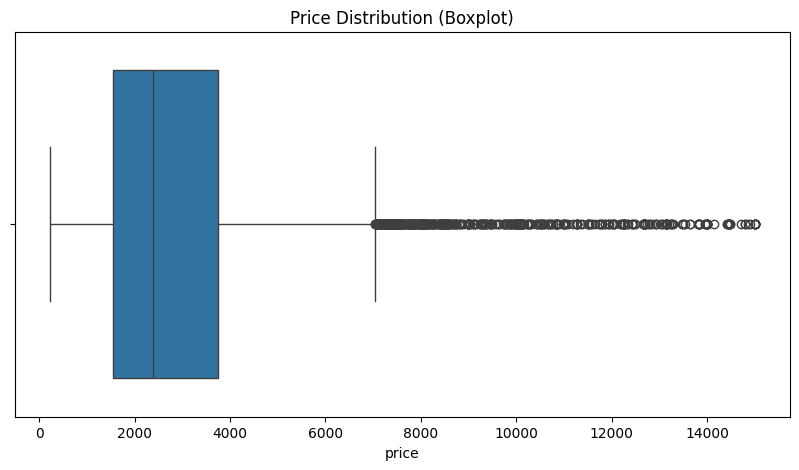

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

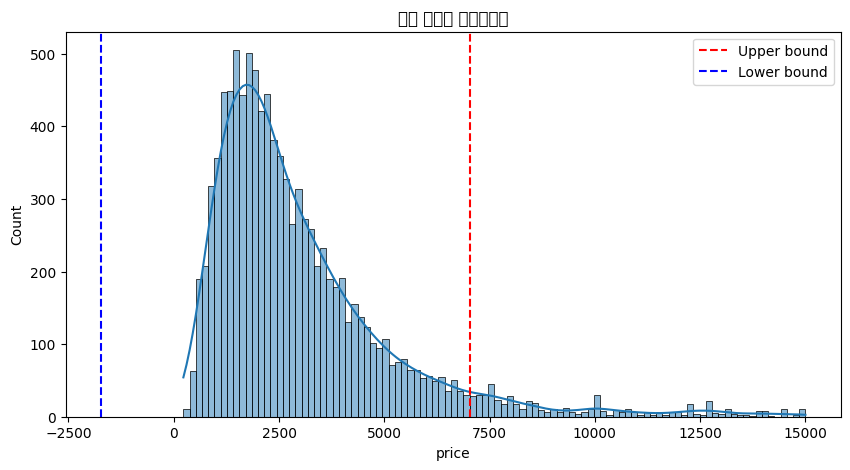

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Q1 (25%):", q1)
print("Q3 (75%):", q3)
print("IQR:", iqr)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# 이상치 비율 확인
outliers = df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]
print("이상치 개수:", len(outliers))
print("이상치 비율: %.2f%%" % (len(outliers) / len(df) * 100))

# 시각화
plt.figure(figsize=(10,5))
sns.boxplot(x=df["price"])
plt.title("Price Distribution (Boxplot)")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=100, kde=True)
plt.axvline(upper_bound, color="red", linestyle="--", label="Upper bound")
plt.axvline(lower_bound, color="blue", linestyle="--", label="Lower bound")
plt.legend()
plt.title("가격 이상치 히스토그램")
plt.show()


### g. csv 파일 추출

In [ ]:
# EDA를 위한 csv 파일 추출

df.to_csv('airbnb_praha_2024.csv', index=False)

# 2. 가설검증

## 가설 1 : 슈퍼호스트와 일반호스트는 청결 점수에서 유의미한 차이가 있을 것이다

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('/content/airbnb_praha_2024.csv')

/tmp/ipython-input-375308183.py:5: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/airbnb_praha_2024.csv')


- 정규성 검정

In [ ]:
shapiro_test = stats.shapiro(df['review_scores_cleanliness'].dropna())
shapiro_test

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8872.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.6717250063789184), pvalue=np.float64(1.04895262316201e-84))

(array([1.900e+01, 5.000e+00, 2.100e+01, 1.100e+01, 1.900e+01, 1.110e+02,
        1.290e+02, 4.730e+02, 1.489e+03, 6.595e+03]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

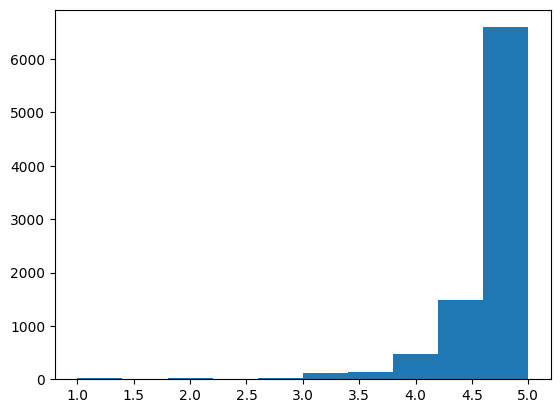

In [ ]:
plt.hist(df['review_scores_cleanliness'], bins=10)

- 등분산성 검정

In [ ]:
df_super = df.loc[df['host_is_superhost']==True, 'review_scores_cleanliness'].dropna()
df_regular = df.loc[df['host_is_superhost']==False, 'review_scores_cleanliness'].dropna()

levene_val = stats.levene(df_super, df_regular)
print(levene_val)

LeveneResult(statistic=np.float64(872.9222793432265), pvalue=np.float64(4.526991438655431e-183))


- Welch's t-test

In [ ]:
stats.ttest_ind(df_super, df_regular)

t_stat, p_value = stats.ttest_ind(df_super, df_regular, equal_var=False)
print(t_stat)
print(p_value)

35.552097762927765
3.909416133271953e-255


## 가설 2 : 청결점수가 전체 평점에 더 유의미한 영향을 미칠 것이다

- 세부 평점 중 하나라도 결측치 있는 행 제거

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

cols = [
    "review_scores_rating",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "review_scores_communication",
    "review_scores_location",
    "review_scores_value",
]

sub_df = df[cols].dropna()

- 모델 학습

In [ ]:
X = sub_df.drop(columns=["review_scores_rating"])
y = sub_df["review_scores_rating"]

model = LinearRegression()
model.fit(X, y)

LinearRegression()

- 계수(가중치) 및 절편

In [ ]:
coef = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

print("Intercept:", intercept)
print("\nCoefficients (가중치):")
print(coef)

print("\nR^2 Score:", model.score(X, y))

Intercept: -0.4511976269832054

Coefficients (가중치):
review_scores_accuracy         0.239685
review_scores_cleanliness      0.260034
review_scores_checkin          0.074022
review_scores_communication    0.158000
review_scores_location         0.049866
review_scores_value            0.309252
dtype: float64

R^2 Score: 0.8478386758253356


In [ ]:
#한글 글씨 폰트 설치
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

- 시각화

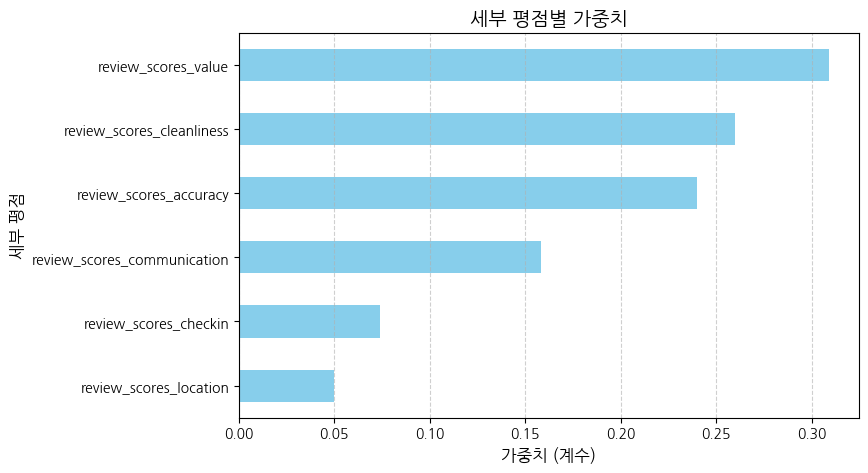

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
coef.sort_values().plot(kind="barh", color="skyblue")
plt.title("세부 평점별 가중치", fontsize=14)
plt.xlabel("가중치 (계수)", fontsize=12)
plt.ylabel("세부 평점", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()


- 통계 검정

In [ ]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())


                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.848
Model:                              OLS   Adj. R-squared:                  0.848
Method:                   Least Squares   F-statistic:                     8231.
Date:                  Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                          12:25:55   Log-Likelihood:                 3819.7
No. Observations:                  8870   AIC:                            -7625.
Df Residuals:                      8863   BIC:                            -7576.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

- 다중공선성 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i+1)  # +1: const 제외
                   for i in range(len(X.columns))]

print(vif_data)

                       feature       VIF
0       review_scores_accuracy  3.622297
1    review_scores_cleanliness  2.596048
2        review_scores_checkin  2.400395
3  review_scores_communication  2.826022
4       review_scores_location  1.573396
5          review_scores_value  3.424278


## 가설 3 : 슈퍼호스트일 때 숙소 가까이에 거주할 가능성이 더 높을 것이다

- 교차표 생성

In [ ]:
cross_table = pd.crosstab(df['host_is_superhost'], df['host_is_nearby'])
cross_table

host_is_nearby,False,True
host_is_superhost,,
False,2288,3990
True,952,2914


- 카이제곱 독립성 검정

In [ ]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(cross_table)

print("Chi-square:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square: 153.22486922844172
p-value: 3.42080481783941e-35
Degrees of freedom: 1
Expected frequencies:
 [[2005.19716088 4272.80283912]
 [1234.80283912 2631.19716088]]


In [ ]:
n = df.shape[0]
cramers_v = np.sqrt(chi2 / (n * ( min(cross_table.shape) - 1 )))
print(cramers_v)

0.1229022997296187


In [ ]:
residuals = (cross_table - expected) / np.sqrt(expected)
residuals

host_is_nearby,False,True
host_is_superhost,,
False,6.315463,-4.326407
True,-8.047944,5.513242


## 가설 4 : 슈퍼호스트일 때 더 적은 수의 숙소를 관리할 것이다

- 등분산성 검정 (Levene's test)

In [ ]:
superhost_listings = df[df['host_is_superhost'] == True]['host_total_listings_count'].dropna()
regular_host_listings = df[df['host_is_superhost'] == False]['host_total_listings_count'].dropna()

levene_stat, levene_p = stats.levene(superhost_listings, regular_host_listings)
print(f"Levene Test P-value: {levene_p}")

equal_variance = True if levene_p > 0.05 else False
print(f"등분산성 만족 여부: {equal_variance}")

Levene Test P-value: 0.0019322746358579126
등분산성 만족 여부: False


In [ ]:
df_super = df.loc[df['host_is_superhost']==True, 'host_total_listings_count'].dropna()
df_regular = df.loc[df['host_is_superhost']==False, 'host_total_listings_count'].dropna()

stats.ttest_ind(df_super, df_regular)

t_stat, p_value = stats.ttest_ind(df_super, df_regular, equal_var=False)
print(t_stat)
print(p_value)

-3.687791641358981
0.0002279644143102207


## 가설 5 : 슈퍼호스트와 일반호스트는 월 평균 리뷰 수에 유의미한 차이가 있을 것이다

- 등분산성 검정

In [ ]:
df_super = df.loc[df['host_is_superhost'] == True, 'reviews_per_month'].dropna()
df_regular = df.loc[df['host_is_superhost'] == False, 'reviews_per_month'].dropna()

levene_val = stats.levene(df_super, df_regular, center='median')
print(levene_val)

LeveneResult(statistic=np.float64(98.7108507538733), pvalue=np.float64(3.856586936776875e-23))


- Welch t-test

In [ ]:
t_stat, p_val = stats.ttest_ind(df_super, df_regular, equal_var=False)

print("슈퍼호스트 평균:", df_super.mean())
print("일반호스트 평균:", df_regular.mean())
print(f"Welch t-test 결과: t={t_stat:.3f}, p={p_val:.4g}")

슈퍼호스트 평균: 2.583592023713285
일반호스트 평균: 1.6394208494208495
Welch t-test 결과: t=23.018, p=2.472e-113


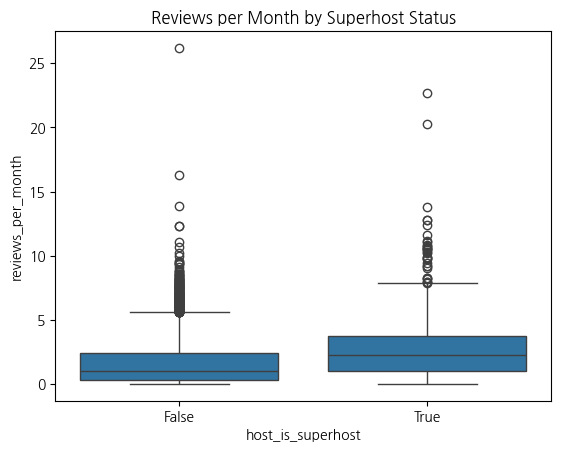

In [ ]:
import seaborn as sns

sns.boxplot(x='host_is_superhost', y='reviews_per_month', data=df)
plt.title('Reviews per Month by Superhost Status')
plt.show()

/tmp/ipython-input-2087145476.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_super, df_regular], labels=['Non-superhost','Superhost'], showfliers=True)


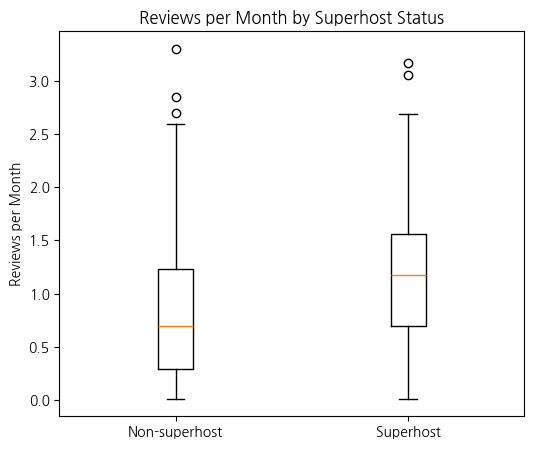

In [ ]:
# 중앙값과 사분위값 차이 더 명확하게 들어나게 하기위해서 log변환으로 왜도 보정
# 대부분의 숙소의 리뷰가 0-2에 머물지만 인기 숙소만 리뷰가 10개 이상으로 있는게 있어서 몰림

# 그룹 분리 + log1p 변환
df_super = np.log1p(df.loc[df['host_is_superhost'] == False, 'reviews_per_month'].astype(float).dropna())
df_regular = np.log1p(df.loc[df['host_is_superhost'] == True,  'reviews_per_month'].astype(float).dropna())

# 박스플롯
plt.figure(figsize=(6,5))
plt.boxplot([df_super, df_regular], labels=['Non-superhost','Superhost'], showfliers=True)
plt.title('Reviews per Month by Superhost Status')
plt.ylabel('Reviews per Month')
plt.show()

## 가설 6 : 아기용품을 어메니티로 가지고 있는 숙소 가격이 더 비쌀 것이다.

In [ ]:
# 아기용품 키워드 리스트
baby_items = ["children", "crib", "baby", "babysitter", "table corner guards", "playground", "backyard", "high chair"]

# 새로운 컬럼 생성
df["has_baby_item"] = df["amenities"].str.lower().apply(
    lambda x: any(item in x for item in baby_items)
)

In [ ]:
# 데이터 분포 확인

df['has_baby_item'].value_counts()

,count
has_baby_item,
False,5777
True,4367


- 정규성 검정

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10144.
  res = hypotest_fun_out(*samples, **kwds)


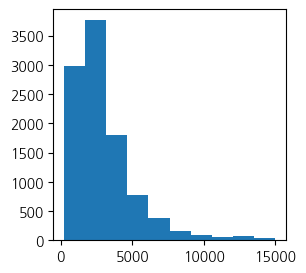

In [ ]:
shapiro_test = stats.shapiro(df['price'].dropna())
shapiro_test

plt.figure(figsize=(3,3))
plt.hist(df['price'], bins=10)

plt.show()

- 등분산성 검정

In [ ]:
df_baby_yes = df.loc[df['has_baby_item']==True, 'price'].dropna()
df_baby_no = df.loc[df['has_baby_item']==False, 'price'].dropna()
levene_val = stats.levene(df_baby_yes, df_baby_no)
print(levene_val)

LeveneResult(statistic=np.float64(34.81927191483264), pvalue=np.float64(3.7335579044312895e-09))


- Welch's t-test

In [ ]:
t_stat, p_value = stats.ttest_ind(df_baby_yes, df_baby_no, equal_var=False)
print(t_stat)
print(p_value)

16.056653395338227
3.0301166551312857e-57


## 가설 7 : 숙소 위치에 따라 가격에 차이가 있을 것이다.

- 등분산성 검증

In [ ]:
df_old_town = df[df['nearest_center']=='Old Town Square']['price']
df_wenceslas = df[df['nearest_center']=='Wenceslas Square']['price']
df_dancing = df[df['nearest_center']=='Dancing House']['price']
df_lennon = df[df['nearest_center']=='Lennon Wall']['price']

levene_val = stats.levene(df_old_town, df_wenceslas, df_dancing, df_lennon)
levene_val

LeveneResult(statistic=np.float64(11.099691536759488), pvalue=np.float64(2.922217718004081e-07))

- Welch's ANOVA

In [ ]:
!pip install pingouin
import pingouin as pg

welch = pg.welch_anova(data=df, dv='price', between='nearest_center')
welch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.4 MB/s eta 0:00:00


,Source,ddof1,ddof2,F,p-unc,np2
0,nearest_center,7,953.054833,46.898637,2.811436e-57,0.032252


- 사후검정

In [ ]:
games_howell = pg.pairwise_gameshowell(data=df, dv='price', between='nearest_center')
games_howell

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Charles Bridge,Dancing House,3952.481013,2761.108434,1191.372579,174.484037,6.827975,191.026484,3.114538e-09,0.561676
1,Charles Bridge,Lennon Wall,3952.481013,3912.873377,39.607636,208.047878,0.190378,331.613870,9.999995e-01,0.018291
2,Charles Bridge,Main Train Station,3952.481013,2692.400560,1260.080453,169.318708,7.442063,169.561920,1.327833e-10,0.610176
3,Charles Bridge,Old Town Square,3952.481013,3526.576923,425.904090,174.995554,2.433799,193.280924,2.312038e-01,0.182604
4,Charles Bridge,Prague Castle,3952.481013,2794.533835,1157.947178,188.336429,6.148291,253.457986,8.436867e-08,0.562254
5,Charles Bridge,Vaclav Havel Airport,3952.481013,2334.168317,1618.312696,264.884821,6.109496,214.265408,1.294967e-07,0.774911
6,Charles Bridge,Wenceslas Square,3952.481013,3303.549534,648.931479,175.027355,3.707600,193.407615,6.526749e-03,0.285595
7,Dancing House,Lennon Wall,2761.108434,3912.873377,-1151.764943,136.225660,-8.454831,426.255197,0.000000e+00,-0.539031
8,Dancing House,Main Train Station,2761.108434,2692.400560,68.707874,62.788023,1.094283,2833.383364,9.581530e-01,0.033012
9,Dancing House,Old Town Square,2761.108434,3526.576923,-765.468489,76.791633,-9.968124,3389.200262,3.034240e-13,-0.340373


# 3. 머신러닝

- 결측치/이상치 처리

In [ ]:
# 불필요한 컬럼 제거

review_cols = [col for col in df.columns if col.startswith("review_scores_")]
df = df.drop(columns=review_cols)

# 결측치 처리

# bathrooms 결측치: room_type별 평균으로 보간
df["bathrooms"] = df.groupby("room_type")["bathrooms"].transform(
    lambda x: x.fillna(x.mean())
)

# bedrooms 결측치: room_type별 평균으로 보간
df["bedrooms"] = df.groupby("room_type")["bedrooms"].transform(
    lambda x: x.fillna(x.mean())
)

# beds 결측치: room_type별 평균으로 보간
df["beds"] = df.groupby("room_type")["beds"].transform(
    lambda x: x.fillna(x.mean())
)

# reviews_per_month 결측치: 리뷰 없으면 0으로 대체
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)

# 이상치 제거 (price 기준)

df_filtered = df[~df["availability_365"].isin([0, 365])].copy()
upper_bound = 7037
df_no_outlier = df_filtered[df_filtered["price"] <= upper_bound].copy()


- 파생변수 생성
  - nearby_avg_price
  - host_duration
  - log_host_duration

In [ ]:
# nearby_avg_price 변수 생성

def haversine(lat1, lon1, lat2, lon2):
    """
    두 좌표 간 haversine 거리 계산 (km)
    """
    R = 6371  # km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

def calc_nearby_avg_price(df, radius_km=1.0):
    """
    같은 room_type 내에서 반경 radius_km 이내 숙소 평균가격 계산
    """
    nearby_prices = []
    for i, row in df.iterrows():
        lat, lon, room = row["latitude"], row["longitude"], row["room_type"]

        # 같은 room_type만 필터링
        same_type = df[df["room_type"] == room]

        distances = haversine(lat, lon, same_type["latitude"].values, same_type["longitude"].values)

        mask = (distances <= radius_km) & (distances > 0)
        neighbors = same_type.loc[mask, "price"]

        if len(neighbors) > 0:
            avg_price = neighbors.mean()
        else:
            avg_price = same_type["price"].mean()  # 반경 내 없으면 룸타입 전체 평균

        nearby_prices.append(avg_price)

    df["nearby_avg_price"] = nearby_prices
    return df


df = calc_nearby_avg_price(df, radius_km=1.0)
print(df[["room_type", "price", "nearby_avg_price"]])

             room_type   price  nearby_avg_price
0      Entire home/apt  3955.0       4087.271003
1      Entire home/apt  2955.0       4047.985977
2      Entire home/apt  3223.0       3848.182342
3      Entire home/apt  6741.0       3996.526538
4      Entire home/apt  2763.0       4061.071355
...                ...     ...               ...
10139  Entire home/apt  2400.0       3348.249081
10140     Private room   523.0       2286.793103
10141  Entire home/apt  2357.0       2926.534527
10142     Private room  1141.0       2265.825581
10143     Private room  1518.0       2595.973077

[10144 rows x 3 columns]


In [ ]:
!pip install haversine

- 중심지 추가하여 center_distance 수정

In [ ]:
from haversine import haversine, Unit

# 프라하 주요 관광지 좌표
centers = {
    "Old Town Square": (50.087, 14.420),        # 구시가지 광장
    "Wenceslas Square": (50.081, 14.425),       # 바츨라프 광장
    "Lennon Wall": (50.086, 14.408),
    "Dancing House": (50.075, 14.414),
    # 새로 추가
    "Prague Castle": (50.090, 14.400),          # 프라하 성 (추가하면 좋음)
    "Charles Bridge": (50.086, 14.411),         # 카를교
    "Main Train Station": (50.083, 14.436),     # Praha hlavní nádraží
    "Vaclav Havel Airport": (50.100, 14.266)    # 공항
}

# 최근접 중심지와 거리 계산

def get_nearest_center(lat, lon):
    distances = {name: haversine((lat, lon), coord, unit=Unit.KILOMETERS)
                 for name, coord in centers.items()}
    nearest = min(distances, key=distances.get)      # 가장 가까운 관광지
    nearest_dist = distances[nearest]                # 그때의 거리
    return pd.Series([nearest, nearest_dist])

df[["nearest_center", "center_distance"]] = df.apply(
    lambda row: get_nearest_center(row["latitude"], row["longitude"]),
    axis=1
)

print(df[["nearest_center", "center_distance"]].head())


       nearest_center  center_distance
0      Charles Bridge         0.523632
1     Old Town Square         0.241979
2  Main Train Station         0.563720
3     Old Town Square         0.464394
4      Charles Bridge         0.449066


In [ ]:
import datetime
df["host_since"] = pd.to_datetime(df["host_since"], errors="coerce")
reference_date = pd.to_datetime("2024-03-25")

# 날짜 차이 계산
df.loc[:, "host_duration"] = (reference_date - df["host_since"]).dt.days
df.loc[:, "log_host_duration"] = np.log1p(df["host_duration"])


# amenities_list
df.loc[:, "amenities_list"] = df["amenities_list"].astype(str).str.lower()

core_amenities = [
    "air conditioning",
    "netflix",
    "smart lock",
    "coffee maker",
    "luggage dropoff allowed",
    "pets allowed",
    "dedicated workspace",
    "tv"
]

# amenity 더미변수
for amenity in core_amenities:
    col = "amenity_" + amenity.replace(" ", "_")
    df.loc[:, col] = df["amenities_list"].apply(lambda x: 1 if amenity in x else 0)


- One-hot 인코딩

In [ ]:
# object, category -> 더미 변수
df_knn = pd.get_dummies(df_no_outlier, columns=["room_type","neighbourhood_cleansed"], drop_first=True)

- 모델 후보
  - KNN (drop)
  - **XGBoost, LightGBM, CatBoost (pick!)**
  - **Stacking (pick!)**

KNN

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np


exclude_cols = [
    "id","name","listing_url","description","neighborhood_overview",
    "host_id","host_name","host_since","host_location","host_about",
    "host_response_time","host_neighbourhood","nearest_center",
    "amenities","amenities_list","price","log_price","price_per_person",
    "host_response_score","host_response_rate","host_acceptance_rate","has_availability"
]

features = [col for col in df_knn.columns if col not in exclude_cols]

X = df_knn[features]
y = df_knn["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN 학습
knn = KNeighborsRegressor(n_neighbors=10, weights="distance")
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("===== KNN =====")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


===== KNN =====
RMSE: 944.3485079913046
R²: 0.5531426139464655


In [ ]:
'''
#KNN 튜닝

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {
    "n_neighbors": [5, 10, 15, 20, 30],
    "weights": ["uniform", "distance"],
    "metric": ["minkowski", "manhattan"]
}

knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV R²:", grid.best_score_)
'''

'\n#KNN 튜닝\n\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.neighbors import KNeighborsRegressor\n\nparam_grid = {\n    "n_neighbors": [5, 10, 15, 20, 30],\n    "weights": ["uniform", "distance"],\n    "metric": ["minkowski", "manhattan"]\n}\n\nknn = KNeighborsRegressor()\ngrid = GridSearchCV(knn, param_grid, cv=5, scoring="r2", n_jobs=-1)\ngrid.fit(X_train, y_train)\n\nprint("Best Params:", grid.best_params_)\nprint("Best CV R²:", grid.best_score_)\n'

In [ ]:
'''
# 최종 X, y (df_knn에서 가져오기)
X = df_knn[features]
y = df_knn["price"]

print("최종 데이터셋 크기:", X.shape, y.shape)
print("제거된 이상치 비율: %.2f%%" % ((len(df) - len(df_no_outlier)) / len(df) * 100))
'''

'\n# 최종 X, y (df_knn에서 가져오기)\nX = df_knn[features]\ny = df_knn["price"]\n\nprint("최종 데이터셋 크기:", X.shape, y.shape)\nprint("제거된 이상치 비율: %.2f%%" % ((len(df) - len(df_no_outlier)) / len(df) * 100))\n'

XGBoost / LightGBM / CatBoost 튜닝

In [ ]:
!pip install Catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error
)
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge


In [ ]:
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 성능 평가 함수
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100

    return {
        "Model": name,
        "RMSE": rmse,
        "R²": r2,
        "MAE": mae,
        "MAPE (%)": mape,
        "MdAPE (%)": mdape
    }

#단일 모델 정의
models = [
    ("RandomForest", RandomForestRegressor(
        n_estimators=500, max_depth=15, random_state=42, n_jobs=-1
    )),
    ("XGBoost", XGBRegressor(
        n_estimators=2000, learning_rate=0.02, max_depth=8,
        subsample=0.7, colsample_bytree=0.6,
        min_child_weight=2, gamma=0.1,
        reg_lambda=1, reg_alpha=0.1,
        random_state=42, n_jobs=-1
    )),
    ("LightGBM", LGBMRegressor(
        n_estimators=2000, learning_rate=0.03, max_depth=8,
        subsample=0.7, colsample_bytree=0.6,
        random_state=42
    )),
    ("CatBoost", CatBoostRegressor(
        iterations=1600, depth=9, learning_rate=0.0318,
        l2_leaf_reg=1.95, bagging_temperature=4.18,
        random_strength=3.89, random_seed=42,
        verbose=0
    )),
]


results = []
for name, model in models:
    results.append(evaluate_model(name, model))

results_df = pd.DataFrame(results)
print("===== 단일 모델 성능 비교 =====")
print(results_df)
'''


'\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# 성능 평가 함수\ndef evaluate_model(name, model):\n    model.fit(X_train, y_train)\n    y_pred = model.predict(X_test)\n\n    rmse = np.sqrt(mean_squared_error(y_test, y_pred))\n    r2 = r2_score(y_test, y_pred)\n    mae = mean_absolute_error(y_test, y_pred)\n    mape = mean_absolute_percentage_error(y_test, y_pred) * 100\n    mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100\n\n    return {\n        "Model": name,\n        "RMSE": rmse,\n        "R²": r2,\n        "MAE": mae,\n        "MAPE (%)": mape,\n        "MdAPE (%)": mdape\n    }\n\n#단일 모델 정의\nmodels = [\n    ("RandomForest", RandomForestRegressor(\n        n_estimators=500, max_depth=15, random_state=42, n_jobs=-1\n    )),\n    ("XGBoost", XGBRegressor(\n        n_estimators=2000, learning_rate=0.02, max_depth=8,\n        subsample=0.7, colsample_bytree=0.6,\n        min_child_weight=2, gamma=0.1,\n        reg_lambda=1, reg_alp

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 3.6 MB/s eta 0:00:00


In [ ]:
'''
from xgboost import XGBRegressor
import optuna
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)


X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

def objective_xgb(trial):
    params = {
        "n_estimators": 2000,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 4, 12),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.1, 10.0, log=True),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
        "random_state": 42,
        "n_jobs": -1
    }
    model = XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
    preds = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, preds))
    return rmse


study_xgb = optuna.create_study(direction="minimize")
study_xgb.optimize(objective_xgb, n_trials=30)
print("Best XGBoost Params:", study_xgb.best_params)
print("Best XGBoost RMSE:", study_xgb.best_value)


In [ ]:
'''
from catboost import CatBoostRegressor

def objective_cat(trial):
    params = {
        "iterations": 2000,
        "depth": trial.suggest_int("depth", 6, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 5),
        "random_strength": trial.suggest_float("random_strength", 0, 5),
        "eval_metric": "RMSE",
        "random_seed": 42,
        "od_type": "Iter",
        "od_wait": 50,
        "verbose": 0
    }
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True, verbose=False)
    preds = model.predict(X_valid)
    rmse = np.sqrt(mean_squared_error(y_valid, preds))
    return rmse

study_cat = optuna.create_study(direction="minimize")
study_cat.optimize(objective_cat, n_trials=30)
print("Best CatBoost Params:", study_cat.best_params)
print("Best CatBoost RMSE:", study_cat.best_value)


Stacking 튜닝
- step1. 단일 모델의 최적 파라미터를 조합
- step2. 메타 모델 성능 비교
- step3. OOF 기반 교차 검증

In [ ]:
'''
# trian, test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 스태킹 앙상블 정의
cat_model = CatBoostRegressor(
    iterations=1600, depth=9, learning_rate=0.0318,
    l2_leaf_reg=1.95, bagging_temperature=4.18,
    random_strength=3.89, random_seed=42, verbose=0
)

lgbm_model = LGBMRegressor(
    n_estimators=2000, learning_rate=0.03,
    max_depth=8, subsample=0.7, colsample_bytree=0.6,
    random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=2000, learning_rate=0.02,
    max_depth=8, subsample=0.7, colsample_bytree=0.6,
    min_child_weight=2, gamma=0.1,
    reg_lambda=1, reg_alpha=0.1,
    random_state=42, n_jobs=-1
)

stack_model = StackingRegressor(
    estimators=[("catboost", cat_model), ("lightgbm", lgbm_model), ("xgboost", xgb_model)],
    final_estimator=Ridge(alpha=1.0),
    n_jobs=-1
)

# 학습 & 평가
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)

print("===== 스태킹 성능 =====")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f%%" % (mean_absolute_percentage_error(y_test, y_pred) * 100))
print("MdAPE: %.2f%%" % (np.median(np.abs((y_test - y_pred) / y_test)) * 100))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.0227,
    max_depth=8,
    subsample=0.677,
    colsample_bytree=0.712,
    min_child_weight=5,
    gamma=0.739,
    reg_lambda=0.213,
    reg_alpha=0.713,
    random_state=42,
    n_jobs=-1
)

best_lgbm = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.0216,
    max_depth=10,
    num_leaves=57,
    subsample=0.641,
    colsample_bytree=0.502,
    reg_lambda=1.804,
    reg_alpha=0.478,
    random_state=42,
    n_jobs=-1
)

best_cat = CatBoostRegressor(
    iterations=2000,
    depth=8,
    learning_rate=0.0343,
    l2_leaf_reg=2.17,
    bagging_temperature=2.14,
    random_strength=3.03,
    random_seed=42,
    verbose=0
)

# 스태킹 앙상블 정의

stack_model = StackingRegressor(
    estimators=[
        ("xgb", best_xgb),
        ("lgbm", best_lgbm),
        ("cat", best_cat)
    ],
    final_estimator=Ridge(alpha=1.0),
    n_jobs=-1
)

def evaluate(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    mdape = np.median(np.abs((y_test - y_pred) / y_test)) * 100
    return {
        "Model": name,
        "RMSE": rmse,
        "R²": r2,
        "MAE": mae,
        "MAPE (%)": mape,
        "MdAPE (%)": mdape
    }

# 단일 모델 vs 스태킹 성능 비교

results = []
for name, model in [("XGBoost", best_xgb), ("LightGBM", best_lgbm), ("CatBoost", best_cat), ("Stacking", stack_model)]:
    results.append(evaluate(name, model, X_train, X_test, y_train, y_test))

results_df = pd.DataFrame(results)
print("===== 단일 vs 스태킹 성능 비교 =====")
print(results_df)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3657
[LightGBM] [Info] Number of data points in the train set: 7131, number of used features: 68
[LightGBM] [Info] Start training from score 2632.590941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [ ]:
'''
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor

# 메타모델 후보
meta_models = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=5000),
    "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=5000),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=300, learning_rate=0.05, max_depth=3, random_state=42
    )
}

results_meta = []

for meta_name, meta_model in meta_models.items():
    stack_model = StackingRegressor(
        estimators=[
            ("xgb", best_xgb),
            ("lgbm", best_lgbm),
            ("cat", best_cat)
        ],
        final_estimator=meta_model,
        n_jobs=-1
    )
    results_meta.append(
        evaluate(f"Stacking + {meta_name}", stack_model, X_train, X_test, y_train, y_test)
    )

results_meta_df = pd.DataFrame(results_meta)
print("===== 메타 모델 성능 비교 (스태킹) =====")
print(results_meta_df)


## 최종 모델

In [ ]:
from sklearn.model_selection import KFold
from sklearn.base import clone
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


# OOF 기반 스태킹 함수
def get_oof_predictions(base_models, X, y, n_splits=5):
    """
    base_models: dict of name -> model
    X, y: train data (pd.DataFrame/Series or np.ndarray)
    """
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    oof_preds = np.zeros((X.shape[0], len(base_models)))

    # numpy array로 통일 (iloc 문제 방지)
    X_np = X.values if hasattr(X, "values") else X
    y_np = y.values if hasattr(y, "values") else y

    for i, (name, model) in enumerate(base_models.items()):
        oof_pred = np.zeros(X_np.shape[0])
        for train_idx, valid_idx in kf.split(X_np, y_np):
            X_tr, X_val = X_np[train_idx], X_np[valid_idx]
            y_tr, y_val = y_np[train_idx], y_np[valid_idx]

            m = clone(model)
            m.fit(X_tr, y_tr)
            oof_pred[valid_idx] = m.predict(X_val)
        oof_preds[:, i] = oof_pred
    return oof_preds

base_models = {
    "XGB": best_xgb,
    "LGBM": best_lgbm,
    "CatBoost": best_cat
}

# OOF 예측
oof_train = get_oof_predictions(base_models, X, y, n_splits=5)

meta_model = Ridge(alpha=98.83)
meta_model.fit(oof_train, y)  # 전체 데이터 기준
# OOF 예측값과 실제 y를 비교해 RMSE, R² 계산
y_pred = meta_model.predict(oof_train)
print("OOF Stacking Performance:", r2_score(y, y_pred))



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3657
[LightGBM] [Info] Number of data points in the train set: 7131, number of used features: 68
[LightGBM] [Info] Start training from score 2632.590941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3651
[LightGBM] [Info] Number of data points in the train set: 7131, number of used features: 67
[LightGBM] [Info] Start training from score 2620.907867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3657
[LightGBM] [Info] Number of data points in the train set: 7131, number of used features: 68
[LightGBM] [Info] Start training from score 2639.270088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3654
[LightGBM] [Info] Number of data points in the train set: 7131, number of used features: 68
[LightGBM] [Info] Start training from score 2650.809143
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3643
[LightGBM] [Info] Number of data points in the train set: 7132, number of used features: 68
[LightGBM] [Info] Start training from score 2638.128575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


OOF Stacking Performance: 0.7435804768350259


In [ ]:
meta_model = Ridge(alpha=98.83)
meta_model.fit(oof_train, y)

y_pred = meta_model.predict(oof_train)

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
mae = np.mean(np.abs(y - y_pred))
mape = np.mean(np.abs((y - y_pred) / y)) * 100
mdape = np.median(np.abs((y - y_pred) / y)) * 100

print("===== 최종 스태킹 앙상블 성능 (OOF) =====")
print("RMSE:", rmse)
print("R²:", r2)
print("MAE:", mae)
print("MAPE: %.2f%%" % mape)
print("MdAPE: %.2f%%" % mdape)

===== 최종 스태킹 앙상블 성능 (OOF) =====
RMSE: 728.8788665056239
R²: 0.7435804768350259
MAE: 502.29494631190636
MAPE: 22.83%
MdAPE: 14.62%


# 4. 시각화
- permutation importance
- SHAP (XGBoost)
- partial dependence display
- Residual Analysis

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor

# 베이스 모델
best_xgb = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.0227,
    max_depth=8,
    subsample=0.677,
    colsample_bytree=0.712,
    min_child_weight=5,
    gamma=0.739,
    reg_lambda=0.213,
    reg_alpha=0.713,
    random_state=42,
    n_jobs=-1
)

best_lgbm = LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.0216,
    max_depth=10,
    num_leaves=57,
    subsample=0.641,
    colsample_bytree=0.502,
    reg_lambda=1.804,
    reg_alpha=0.478,
    random_state=42,
    n_jobs=-1
)

best_cat = CatBoostRegressor(
    iterations=2000,
    depth=8,
    learning_rate=0.0343,
    l2_leaf_reg=2.17,
    bagging_temperature=2.14,
    random_strength=3.03,
    random_seed=42,
    verbose=0
)

# 최종 스태킹 앙상블
final_stack = StackingRegressor(
    estimators=[
        ("xgb", best_xgb),
        ("lgbm", best_lgbm),
        ("cat", best_cat)
    ],
    final_estimator=Ridge(alpha=98.83),
    n_jobs=-1
)

final_stack.fit(X, y)

print("시각화를 위한 모델 학습 완료")


시각화를 위한 모델 학습 완료


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


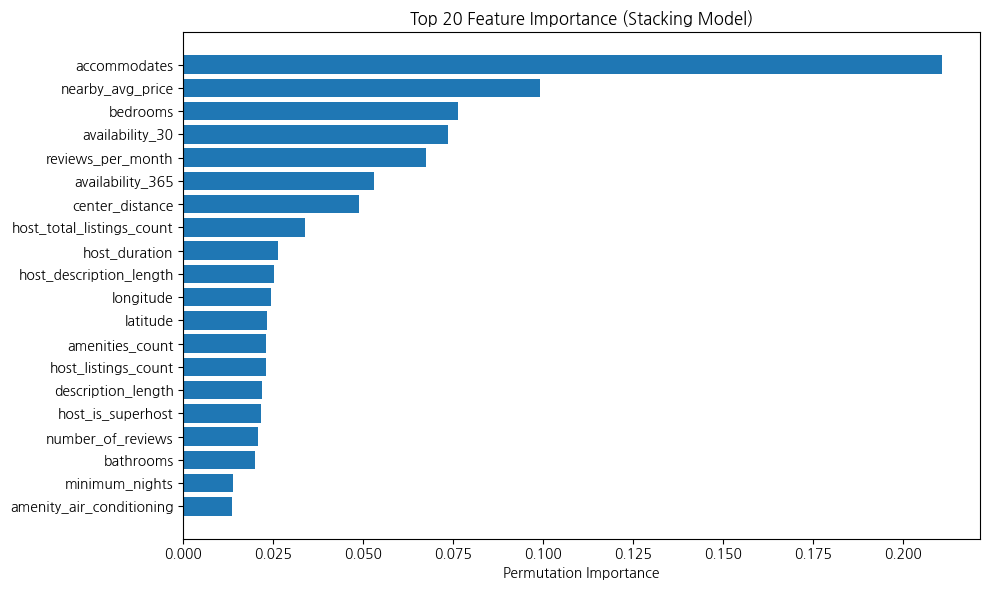

/usr/local/lib/python3.12/dist-packages/shap/plots/_beeswarm.py:1150: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


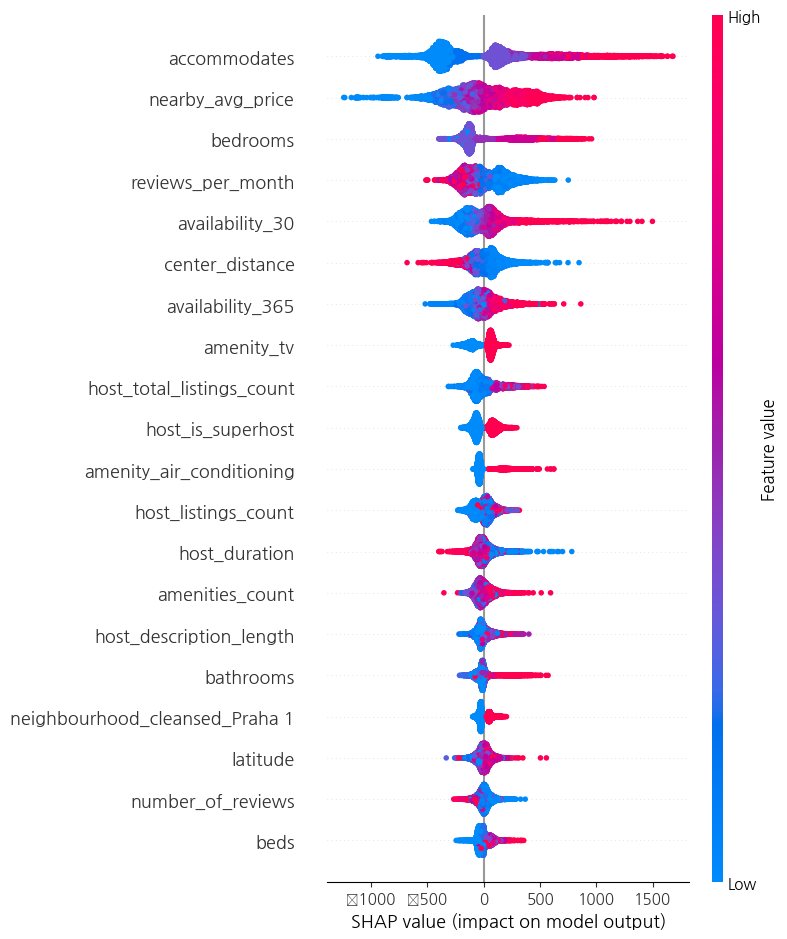

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


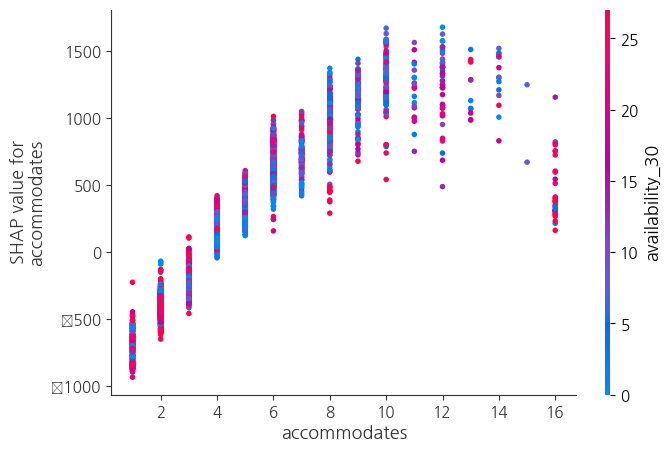

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


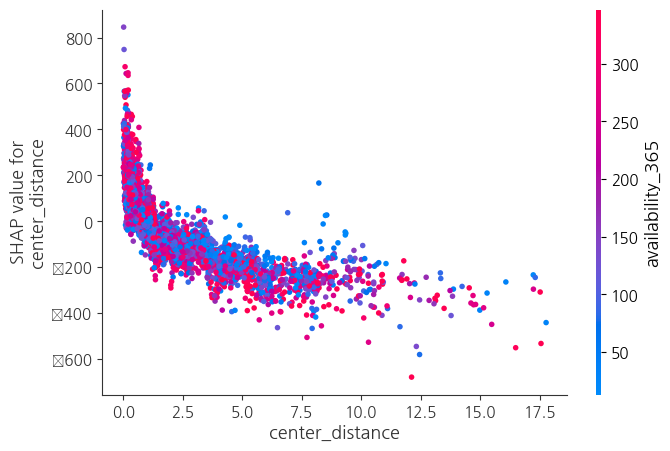

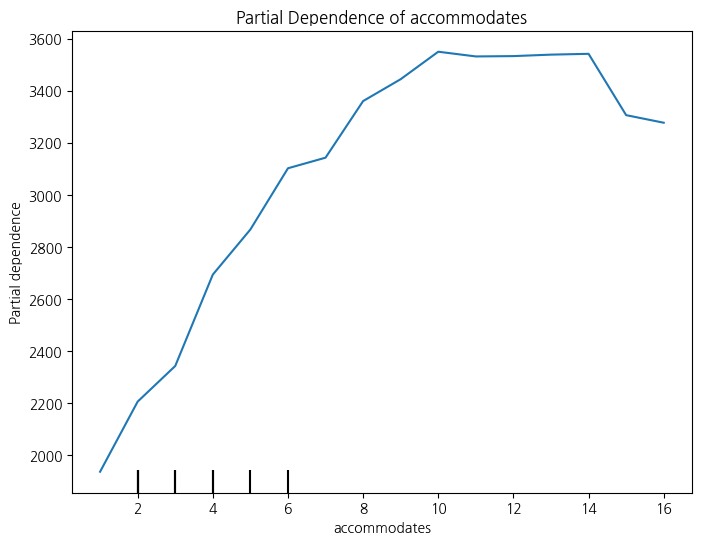

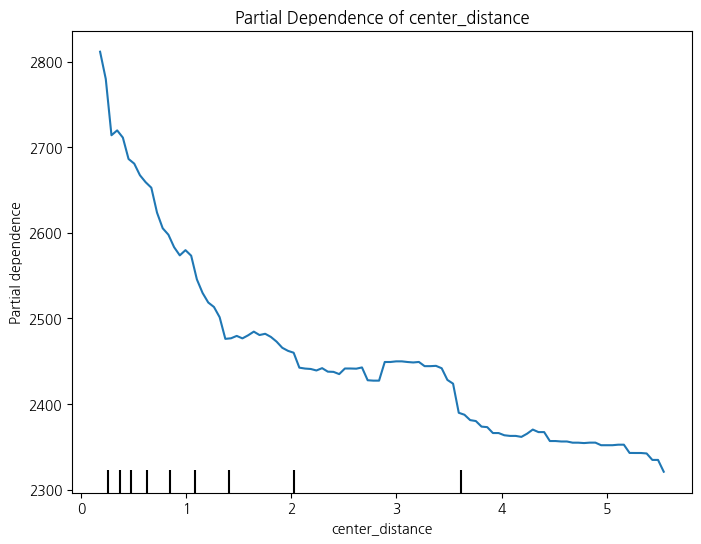

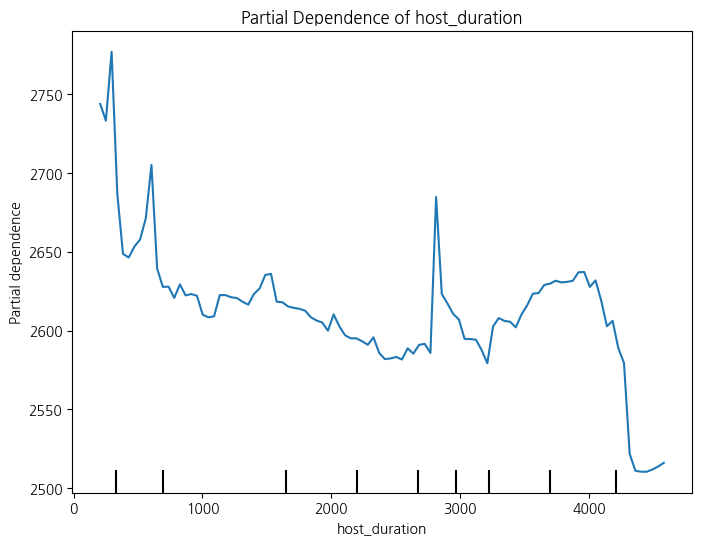

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


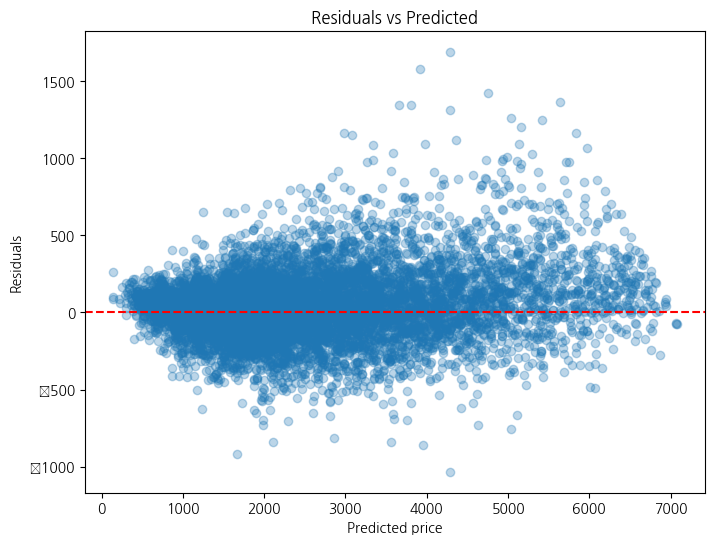

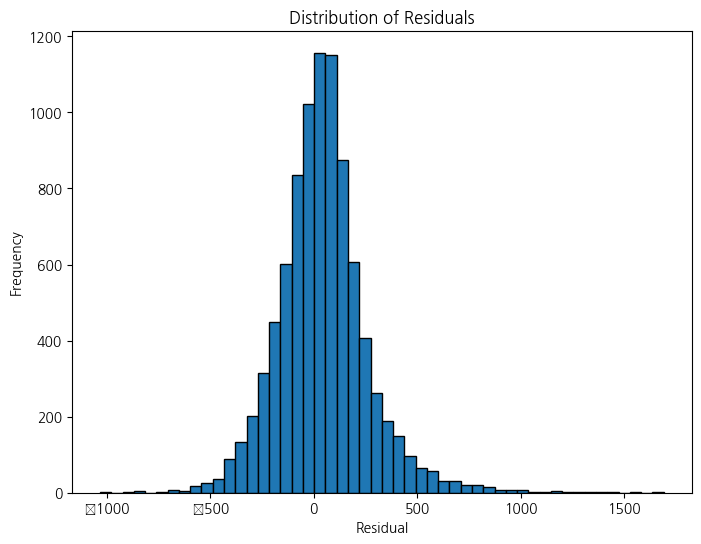

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import shap
import numpy as np

# 1. Permutation Importance

result = permutation_importance(
    final_stack, X, y, n_repeats=10, random_state=42, n_jobs=-1
)

importances = pd.DataFrame({
    "feature": X.columns,
    "importance_mean": result.importances_mean,
    "importance_std": result.importances_std
}).sort_values("importance_mean", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importances["feature"][:20][::-1], importances["importance_mean"][:20][::-1])
plt.xlabel("Permutation Importance")
plt.title("Top 20 Feature Importance (Stacking Model)")
plt.tight_layout()
plt.show()

# 2. SHAP (XGBoost)
best_xgb.fit(X, y)

explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X, plot_type="dot")

# Dependence Plot
shap.dependence_plot("accommodates", shap_values, X)
shap.dependence_plot("center_distance", shap_values, X)

# Partial Dependence Plots (PDP)

features_to_plot = ["accommodates", "center_distance", "host_duration"]

for feature in features_to_plot:
    fig, ax = plt.subplots(figsize=(8, 6))
    PartialDependenceDisplay.from_estimator(final_stack, X, [feature], ax=ax)
    plt.title(f"Partial Dependence of {feature}")
    plt.show()

# 4. Residual Analysis
y_pred = final_stack.predict(X)
residuals = y - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# 잔차 분포 확인
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, edgecolor="k")
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()
